## Project description

I work for the OilyGiant mining company. The task is to find the best place for a new well.

Steps to choose the location:

  Collect the oil well parameters in the selected region: oil quality and volume of reserves;
  
  Build a model for predicting the volume of reserves in the new wells;
  
  Pick the oil wells with the highest estimated values;
  
  Pick the region with the highest total profit for the selected oil wells.
  
I have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

## Project instructions

### 1. Download and prepare the data. Explain the procedure.

In [3]:
import pandas as pd
import numpy as np
!pip install sidetable
import sidetable as stb

In [4]:
import os

Let's import the data and check the data.

In [5]:
df_0 = pd.read_csv('ML_3/geo_data_0.csv')
print(df_0.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


In [6]:
df_1 =pd.read_csv('ML_3/geo_data_1.csv')

In [7]:
print(df_1.head())

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


In [8]:
df_2 = pd.read_csv('ML_3/geo_data_2.csv')
print(df_2.head())

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [9]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


All columns except 'id' column are numerical. This 'id' column does not have any impact on target column therefore it will be dropped soon.

Let's check for the missing values.

In [12]:
df_0.stb.missing(style=True)

,missing,total,percent
id,0,"100,000",0.00%
f0,0,"100,000",0.00%
f1,0,"100,000",0.00%
f2,0,"100,000",0.00%
product,0,"100,000",0.00%


In [13]:
df_1.stb.missing(style=True)

,missing,total,percent
id,0,"100,000",0.00%
f0,0,"100,000",0.00%
f1,0,"100,000",0.00%
f2,0,"100,000",0.00%
product,0,"100,000",0.00%


In [14]:
df_2.stb.missing(style=True)

,missing,total,percent
id,0,"100,000",0.00%
f0,0,"100,000",0.00%
f1,0,"100,000",0.00%
f2,0,"100,000",0.00%
product,0,"100,000",0.00%


All data is clean.

In [15]:
df_0.shape

(100000, 5)

In [16]:
df_1.shape

(100000, 5)

In [17]:
df_2.shape

(100000, 5)

All separate data has the same nmber of rows and columns.

Let's drop the 'id' column from the data.

In [18]:
df_0=df_0.drop(['id'],axis=1)
df_1=df_1.drop(['id'],axis=1)
df_2=df_2.drop(['id'],axis=1)

df_0.head()


,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [19]:
df_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [20]:
df_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


Let's see about duplicates.

In [21]:
df_0.duplicated().sum()

0

In [22]:
df_1.duplicated().sum()

0

In [23]:
df_2.duplicated().sum()

0

There are no duplicates in our data.

Let's see the plots for every feature.

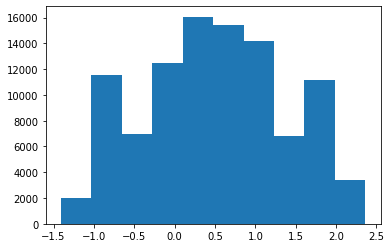

In [24]:
import matplotlib.pyplot as plt

plt.hist(df_0['f0'], bins = 10)

plt.show()

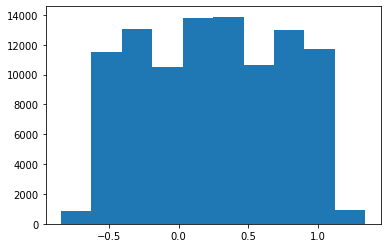

In [25]:
plt.hist(df_0['f1'], bins = 10)

plt.show()

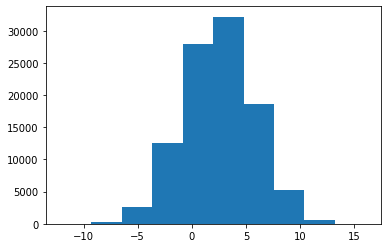

In [26]:
plt.hist(df_0['f2'], bins = 10)

plt.show()

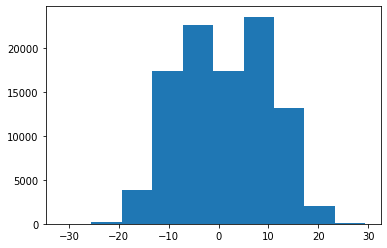

In [27]:
plt.hist(df_1['f0'], bins = 10)

plt.show()

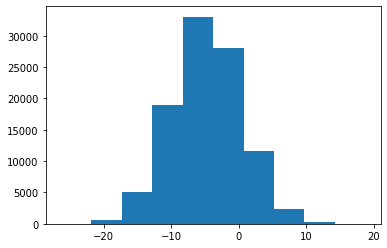

In [28]:
plt.hist(df_1['f1'], bins = 10)

plt.show()

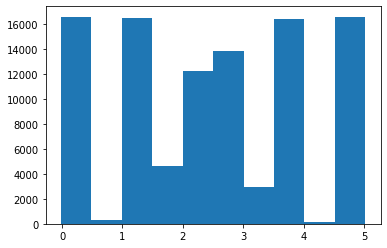

In [29]:
plt.hist(df_1['f2'], bins = 10)

plt.show()

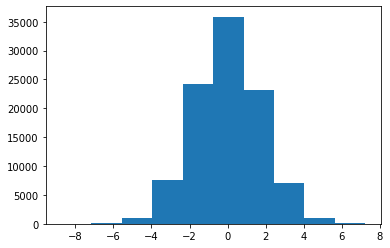

In [30]:
plt.hist(df_2['f0'], bins = 10)
plt.show()

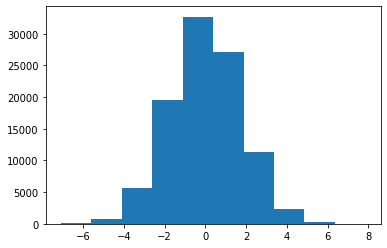

In [31]:
plt.hist(df_2['f1'], bins = 10)
plt.show()

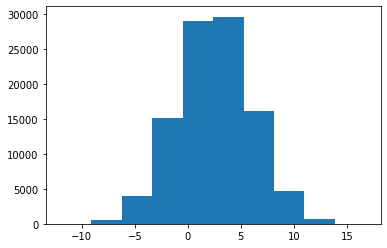

In [32]:
plt.hist(df_2['f2'], bins = 10)
plt.show()

From the plot above it is obvious that the feature data needs to be normalized.

## Train and test the model for each region:

     2.1. Split the data into a training set and validation set at a ratio of 75:25.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_0,valid_0=train_test_split(df_0,test_size=0.25,random_state=12345,shuffle=True)

train_1,valid_1=train_test_split(df_1,test_size=0.25,random_state=12345,shuffle=True)

train_2,valid_2=train_test_split(df_2,test_size=0.25,random_state=12345,shuffle=True)

2.2 Train the model and make predictions for the validation set.

As was mantioned before I need to standardize​ the features.

df_0 (As first region).

In [36]:
numeric=['f0','f1','f2']
scaler_0=StandardScaler()
scaler_0.fit(train_0[numeric])
train_0[numeric]=scaler_0.transform(train_0[numeric])
valid_0[numeric]=scaler_0.transform(valid_0[numeric])

/tmp/ipykernel_37/3018974105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_0[numeric]=scaler_0.transform(train_0[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [37]:
train_0.head()

,f0,f1,f2,product
27212,-0.544828,1.390264,-0.094959,147.370612
7866,1.455912,-0.480422,1.209567,147.630053
62041,0.260460,0.825069,-0.204865,77.696728
70185,-1.837105,0.010321,-0.147634,55.210501
82230,-1.299243,0.987558,1.273181,113.891723


In [38]:
valid_0.head()

,f0,f1,f2,product
71751,0.517917,-0.610097,-0.126226,10.038645
80493,0.568391,-0.086063,-0.814914,114.551489
2655,0.805688,-1.613289,-1.341342,132.603635
53233,0.222503,-1.355437,-0.597275,169.072125
91141,-0.087941,1.433113,-0.544588,122.325180


df_1 (As second region).

In [42]:
scaler_1=StandardScaler()
scaler_1.fit(train_1[numeric])
train_1[numeric]=scaler_1.transform(train_1[numeric])
valid_1[numeric]=scaler_1.transform(valid_1[numeric])

/tmp/ipykernel_37/1222886467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1[numeric]=scaler_1.transform(train_1[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [40]:
train_1.head()

,f0,f1,f2,product
27212,-6.488552,-1.590478,3.001311,84.038886
7866,18.819463,4.602079,2.996867,80.859783
62041,10.816499,-3.919653,1.991077,53.906522
70185,-12.416362,-9.343774,0.996691,30.132364
82230,-15.041012,-8.474624,1.996463,57.085625


In [41]:
valid_1.head()

,f0,f1,f2,product
71751,-0.371866,-1.862494,3.002210,80.859783
80493,9.015122,-13.881455,1.995363,53.906522
2655,-6.507568,-4.817448,1.003449,30.132364
53233,14.560845,-10.667755,1.995175,53.906522
91141,6.090476,-4.494723,0.013815,0.000000


df_2 (As third region).

In [47]:
scaler_2=StandardScaler()
scaler_2.fit(train_2[numeric])
train_2[numeric]=scaler_2.transform(train_2[numeric])
valid_2[numeric]=scaler_2.transform(valid_2[numeric])


/tmp/ipykernel_37/3232950096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2[numeric]=scaler_2.transform(train_2[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [48]:
train_2.head()

,f0,f1,f2,product
27212,-0.526160,0.776329,-0.400793,16.733577
7866,-0.889625,-0.404070,-1.222936,38.047492
62041,-1.133984,0.208576,0.296765,116.149369
70185,1.227045,1.570166,-0.764556,105.888803
82230,-0.194289,0.878312,0.840821,27.570897


In [49]:
valid_2.head()

,f0,f1,f2,product
71751,-0.836717,-2.227439,-0.078489,61.212375
80493,-0.821648,0.740237,-1.000811,41.850118
2655,-2.651336,-0.235721,-0.244546,57.776581
53233,1.077998,0.938090,0.511313,100.053761
91141,-1.173938,2.387270,1.034363,109.897122


Time to train the model.

Let's create features and target for each df (region). It is also step 2.3

In [50]:
# Target and Features of df_0 (first region)
target_0_train=train_0['product']
features_0_train=train_0.drop(['product'],axis=1)

target_0_valid=valid_0['product']
features_0_valid=valid_0.drop(['product'],axis=1)

# Target and Features of df_1 (second region)
target_1_train=train_1['product']
features_1_train=train_1.drop(['product'],axis=1)

target_1_valid=valid_1['product']
features_1_valid=valid_1.drop(['product'],axis=1)

# Target and Features of df_2 (third region)
target_2_train=train_2['product']
features_2_train=train_2.drop(['product'],axis=1)

target_2_valid=valid_2['product']
features_2_valid=valid_2.drop(['product'],axis=1)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
#df_0 (first region) learning.
model=LinearRegression()
fit_0=model.fit(features_0_train,target_0_train)
predict_valid_0=model.predict(features_0_valid)

#df_1 (second region) Learning.
fit_1=model.fit(features_1_train,target_1_train)
predict_valid_1=model.predict(features_1_valid)

#df_2 (third region) Learning.
fit_2=model.fit(features_2_train,target_2_train)
predict_valid_2=model.predict(features_2_valid)

2.4. Print the average volume of predicted reserves and model RMSE.

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mse_0=mean_squared_error(target_0_valid,predict_valid_0)
print('Linear Regression ML for first region:')
print('MSE of First region:',mse_0)
print('RMSE of the First region:',mse_0**0.5)

Linear Regression ML for first region:
MSE of First region: 1412.2129364399243
RMSE of the First region: 37.5794217150813


In [55]:
mse_1=mean_squared_error(target_1_valid,predict_valid_1)
print('Linear Regression ML for the second region:')
print('MSE of the Secong region:',mse_1)
print('RMSE of the Second region:',mse_1**0.5)

Linear Regression ML for the second region:
MSE of the Secong region: 0.7976263360391157
RMSE of the Second region: 0.893099286775617


In [56]:
mse_2=mean_squared_error(target_2_valid,predict_valid_2)
print('Linear Regression ML for first region:')
print('MSE of First region:',mse_2)
print('RMSE of the First region:',mse_2**0.5)

Linear Regression ML for first region:
MSE of First region: 1602.3775813236196
RMSE of the First region: 40.02970873393434


In [57]:
#Avg volume of predicted reserves.

avg_vol_0=predict_valid_0.mean()
print('Average volume of predicted reserves for first region:', avg_vol_0)

Average volume of predicted reserves for first region: 92.59256778438035


In [58]:
avg_vol_1=predict_valid_1.mean()
print('Average volume of predicted reserves for second region:', avg_vol_1)

Average volume of predicted reserves for second region: 68.728546895446


In [59]:
avg_vol_2=predict_valid_2.mean()
print('Average volume of predicted reserves for first region:', avg_vol_2)

Average volume of predicted reserves for first region: 94.96504596800489


Conclusion. From the results above the lowest RMSE is in second region which means the data deviates les from the line. However the average volume of predicted reserves are better in first and third regions.

## Prepare for profit calculation.

3.1. Store all key values for calculations in separate variables.

We need to consider the conditions that were given in this project.

In [60]:
budget_for_200_wells=10**8
one_unit_oil_well=(10**8)/200
unit_rev=4500
min_risk=0.025

3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

Let's calculate the volume of reserves sufficient for developing a new well without losses.

In [61]:
no_loss=round(one_unit_oil_well/unit_rev)
print('Volume of reserves sufficient for developing a new well without losses is:',no_loss)

Volume of reserves sufficient for developing a new well without losses is: 111


3.3. Provide the findings about the preparation for profit calculation step.

Which means there should be no less than 111000 barrels for one oil well. 

From this result we see that all regions are insufficient for developing a new oil well because all of them are less than 111000 barrels.

## Write a function to calculate profit from a set of selected oil wells and model predictions.

4.1. Pick the wells with the highest values of predictions.

From the conditions we need to choose out of 500 observations 200 best.

Let's add column of predictions (calculated above) for validation data set.

In [62]:
from numpy.random import RandomState

In [67]:
valid_0['predictions']=predict_valid_0
valid_1['predictions']=predict_valid_1
valid_2['predictions']=predict_valid_2

## Let's create 200 best.
first_200_best=valid_0.sample(n=500,replace=True).sort_values(by=['predictions'],ascending=False).head(200)
second_200_best=valid_1.sample(n=500,replace=True).sort_values(by=['predictions'],ascending=False).head(200)
third_200_best=valid_2.sample(n=500,replace=True).sort_values(by=['predictions'],ascending=False).head(200)

/tmp/ipykernel_37/2168126677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_0['predictions']=predict_valid_0
/tmp/ipykernel_37/2168126677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['predictions']=predict_valid_1
/tmp/ipykernel_37/2168126677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

4.2. Summarize the target volume of reserves in accordance with these predictions.

In [68]:
first_region_barr=first_200_best['product'].sum()
print('First region top 200 oil wells volume reserves:',first_region_barr)

First region top 200 oil wells volume reserves: 23161.179349189228


In [69]:
second_region_barr=second_200_best['product'].sum()
print('Second region top 200 oil wells volume reserves:',second_region_barr)

Second region top 200 oil wells volume reserves: 23585.070955557334


In [70]:
third_region_barr=third_200_best['product'].sum()
print('Third region top 200 oil wells volume reserves:',third_region_barr)

Third region top 200 oil wells volume reserves: 23528.417706353346


From the results above first region has the largest amout of barrels. 

4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [71]:
## First region revenue.
top_200_first_rev=first_region_barr*unit_rev-budget_for_200_wells
print('Revenue of first region for top 200 spots:',top_200_first_rev)

Revenue of first region for top 200 spots: 4225307.071351528


In [72]:
## Second region revenue.
top_200_second_rev=second_region_barr*unit_rev-budget_for_200_wells
print('Revenue of second region for top 200 spots:',top_200_second_rev)

Revenue of second region for top 200 spots: 6132819.300007999


In [73]:
## Third region revenue.
top_200_third_rev=third_region_barr*unit_rev-budget_for_200_wells
print('Revenue of third region for top 200 spots:',top_200_third_rev)

Revenue of third region for top 200 spots: 5877879.678590059


From the results above the most profitable region is second region.

## Calculate risks and profit for each region.

5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.

In [74]:
state = np.random.RandomState(12345)

In [75]:
## First region
values_0=[]
subsample_0=[]
sub_barr_0=0
for i in range(1000):
    subsample_0=valid_0.sample(n=500,replace=True,random_state=state).sort_values(by=['predictions'],ascending=False).head(200)
    sub_barr_0=subsample_0['product'].sum()
    sub_rev_0=sub_barr_0*unit_rev-budget_for_200_wells
    values_0.append(sub_rev_0)
values_0=pd.Series(values_0)    
avg_rev_0=values_0.mean()

print('Average revenue of first region is:',avg_rev_0)

Average revenue of first region is: 3961649.8480237117


In [76]:
## Second region.
values_1=[]
subsample_1=[]
sub_barr_1=0
for i in range(1000):
    subsample_1=valid_1.sample(n=500,replace=True,random_state=state).sort_values(by=['predictions'],ascending=False).head(200)
    sub_barr_1=subsample_1['product'].sum()
    sub_rev_1=sub_barr_1*unit_rev-budget_for_200_wells
    values_1.append(sub_rev_1)
values_1=pd.Series(values_1)    
avg_rev_1=values_1.mean()

print('Average revenue of second region is:',avg_rev_1)

Average revenue of second region is: 4611558.172772396


In [77]:
## Third region.
values_2=[]
subsample_2=[]
sub_barr_2=0
for i in range(1000):
    subsample_2=valid_2.sample(n=500,replace=True,random_state=state).sort_values(by=['predictions'],ascending=False).head(200)
    sub_barr_2=subsample_2['product'].sum()
    sub_rev_2=sub_barr_2*unit_rev-budget_for_200_wells
    values_2.append(sub_rev_2)
values_2=pd.Series(values_2)    
avg_rev_2=values_2.mean()

print('Average revenue of third region is:',avg_rev_2)

Average revenue of third region is: 3929504.7517060456


From the results the most profitable region is second region.

5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

In [80]:
## First region
#values_0_con=[]
#subsample_0_con=[]
#sub_barr_0_con=0
#for i in range(1000):
#    subsample_0_con=valid_0.sample(n=500,replace=True,random_state=state).sort_values(by=['predictions'],ascending=False).head(200)
#    sub_barr_0_con=subsample_0_con['product'].sum()
#    sub_rev_0_con=sub_barr_0_con*unit_rev-budget_for_200_wells
#    values_0_con.append(sub_rev_0_con)
#values_0_con=pd.Series(values_0_con)    
#avg_rev_0_con=values_0_con.mean()

lower_0=np.quantile(values_0,0.025)
upper_0=np.quantile(values_0,0.975)

print('Average revenue of first region is:',avg_rev_0)
print()
print('The lower average revenue is:',lower_0)
print('The upper average revenue is:',upper_0)


Average revenue of first region is: 3961649.8480237117

The lower average revenue is: -1112155.4589049604
The upper average revenue is: 9097669.41553423


In [81]:
## Second region
#values_1_con=[]
#subsample_1_con=[]
#sub_barr_1_con=0
#for i in range(1000):
#    subsample_1_con=valid_1.sample(n=500,replace=True,random_state=state).sort_values(by=['predictions'],ascending=False).head(200)
#    sub_barr_1_con=subsample_1_con['product'].sum()
 #   sub_rev_1_con=sub_barr_1_con*unit_rev-budget_for_200_wells
#    values_1_con.append(sub_rev_1_con)
#values_1_con=pd.Series(values_1_con)    
#avg_rev_1_con=values_1_con.mean()

lower_1=np.quantile(values_1,0.025)
upper_1=np.quantile(values_1,0.975)

print('Average revenue of second region is:',avg_rev_1)
print()
print('The lower average revenue is:',lower_1)
print('The upper average revenue is:',upper_1)


Average revenue of second region is: 4611558.172772396

The lower average revenue is: 780508.107517418
The upper average revenue is: 8629520.602637231


In [82]:
## Third region
#values_2_con=[]
#subsample_2_con=[]
#sub_barr_2_con=0
#for i in range(1000):
#    subsample_2_con=valid_2.sample(n=500,replace=True,random_state=state).sort_values(by=['predictions'],ascending=False).head(200)
#    sub_barr_2_con=subsample_2_con['product'].sum()
#    sub_rev_2_con=sub_barr_2_con*unit_rev-budget_for_200_wells
#    values_2_con.append(sub_rev_2_con)
#values_2_con=pd.Series(values_2_con)    
#avg_rev_2_con=values_2_con.mean()

lower_2=np.quantile(values_2,0.025)
upper_2=np.quantile(values_2,0.975)

print('Average revenue of the third region is:',avg_rev_2)
print()
print('The lower average revenue is:',lower_2)
print('The upper average revenue is:',upper_2)


Average revenue of the third region is: 3929504.7517060456

The lower average revenue is: -1122276.2537857532
The upper average revenue is: 9345629.145511637


Loss calculation.

First region.

In [88]:
count_0=0 #Number of negative average revenue values
for i in range(len(values_0)):
    if values_0_con[i]<0:
        count_0=count_0+1

print(count_0)

57


In [92]:
tot_count_0=values_0.count()
loss_0=count_0/tot_count_0
print('Loss of the first region is: {:.2%}'.format(loss_0))

Loss of the first region is: 5.70%


Second region.

In [93]:
count_1=0 #Number of negative average revenue values
for i in range(len(values_1)):
    if values_1_con[i]<0:
        count_1=count_1+1
        
tot_count_1=values_1.count()
loss_1=count_1/tot_count_1
print('Loss of the second region is: {:.2%}'.format(loss_1))

Loss of the second region is: 1.30%


Third region.

In [94]:
count_2=0 #Number of negative average revenue values
for i in range(len(values_2)):
    if values_2[i]<0:
        count_2=count_2+1
        
tot_count_2=values_2.count()
loss_2=count_2/tot_count_2
print('Loss of the third region is: {:.2%}'.format(loss_2))

Loss of the third region is: 6.50%


5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

From the analysis the conclusion that the best region as a profitble and less loss in profit is the second region.

All the best!